# Book Ratings: Exploratory Data Analysis


### The Problem
A good book can transport you into another world or give you deep insight into the one around you. Hundreds of thousands of books are published in the US each year, more than any one person can read. With so many books available, how can you find one you’ll like (or better yet, love)? In my experience, the best recommendations come from people who know me well (friends) or people who know books well (professional booksellers). When there isn’t time to visit a local independent bookstore, book reviews can be found online. One of the largest platforms for the book-loving community is GoodReads.com. Members can keep track of what they’ve read, leave reviews and ratings, and make lists of books they want to read. In this project, I will explore GoodReads user’s ratings to examine trends and build several recommendation models to predict which books a user will love.

### The Client
Clients who may be interested in this project’s findings are readers and booksellers. With so many books out there and so little time, these recommendation models could help a reader narrow down their list to books they’re likely to love. It would also help booksellers make suggestions to customers. Exploration of emerging topics and changing the popularity of genres could increase sales by giving publishers and booksellers insights into which books to promote or add on to a sale.

### The Data
The data used for this project originally comes from the GoodReads.com website. It was scraped, cleaned and made available by Zygmunt Zając on GitHub (https://github.com/zygmuntz/goodbooks-10k). The user and item data was downloaded as CSV files.

**books.csv** - There are 10,000 books in this dataset. Descriptions of the columns are below. It's noted if the column is missing entries.  
Columns:  
- **books_count**: the number of editions for a given work.
- **authors**: the authors(s) name.
- **original_publication_year**: (9979 non-null)  
- **original_title**: (9415 non-null)  
- **title**: similar to *original_title* and includes the order it appears in a books series. 
- **language_code**: unclear if this is the language of the original edition or post popular edition. (8916 non-null, object) 
- **average_rating**: the mean rating out of 1-5 stars.
- **ratings_count**: presumably, the number of unique users who have rated this book. It is lower than *work_ratings_count*. 
- **work_ratings_count**: number of total ratings a book received, may include multiple ratings per user?
- **work_text_reviews_count**: number of written reviews, which is different than numerical ratings (number of stars).
- **ratings_1**: number of 1-star ratings. 
- **ratings_2**: number of 2-star ratings.
- **ratings_3**: number of 3-star ratings.
- **ratings_4**: number of 4-star ratings.  
- **ratings_5**: number of 5-star ratings.

**ratings.csv** - On a scale of 1-5, how did the user rate a book? The list contains 5,976,479 book-user pairs and 53,424 unique users.   
Columns: user_id, book_id, rating (1, 2, 3, 4, or 5).  

**to_read.csv** - Each entry represent a book that a user wants to read. There are 912,705 pair-wise entries.  
Columns: user_id, book_id.  

**tags.csv** - A list of user-created tags. These vary widely from genres to “16th-century” to “30-books-to-read-before-30”. There are 534,252 unique tag names.     
Columns: tag_id, tag_name.  

**book_tags.csv** - The number of times each tag was given to a specific book. The list contains 999,912 book-tag pairs.   
Columns: goodreads_book_id, tag_id,	count.  

### Cleaning Steps
With 534,252 unique tags included, additional cleaning steps were needed to sift through and extract a meaningful subset that could be used as genre categories. 

### Executive Summary:
* The average rating per book is **4.00219**. 
* Most books in this dataset (~90%) have been rated between 10,000 and 100,000 times, with a **mean of 59,687 ratings per book**.
* Overall, the numerical metadata we have in this dataset (such as the date a book was published, number of ratings, or the number of editions) doesn't tell us much about how highly it will be rated. This implies there are other factors, such as the quality of writting, that have more impact on ratings.
* Of the numeric variables, the presence of 2-star ratings (even more than the presence of 1-star ratings) seem to be an indicator that a book will have a lower overall rating.
* **Young adult series are popular** -- think The Hunger Games, Harry Potter, Twilight, Divergent, and the Hobbit. Specifically, the first book in this type of series receive the most ratings. 
* The first book of the **Twilight** series was rated by nearly 400,000 GoodReads users. It's the 3rd most rated book on this dataset. However, you have to go all the way down the list to the 46th most rated book ("Eat, Pray, Love") before find one that's rated lower than Twilight's 3.57 average. This prompts the question, why have so many people read it if it wasn't liked by the majority of them?
* **Calvin and Hobbes** and **Harry Potter** top the charts for most beloved books.
* Looking at books with a high variance in ratings, it isn't surprising to find that **religion and sexuality are controversial subjects.** The list of the top 15 books we don't agree on include **Fifty Shades of Grey, Twilight, The Book of Mormon, The Qur'an,** and **The Holy Bible.** 
* **Only 20% of users have an average rating that's less than 3.5 stars.** This could suggest a couple things: Goodreads users like reading and have a positive bias towards books in general; people are more likely to take the time to rate something they like; or 
* **80% of users only vary their ratings by 1 point.** For example, a user might always give books 4-star or 5-star ratings. Another might only give out 2-star or 3-star ratings. 
* Some people only give out 5-star ratings, some only give 1-star ratings, but **no user in this data set only gives 2-star ratings.**
* The top 3 most used tags are "to-read", "favorites", and "owned".
* The most popular genres by volume are **Fantasy, Romance, Mystery and Young Adult**, each were tagged on 3,600-4,300 books.
* Genres that have a positive correlation with book ratings are: 'childrens' 'christian' 'fantasy' 'graphic-novels' 'paranormal'. On the other end, 'chick-lit' and 'novels' tend to receive lower ratings.

# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)

In [2]:
# Load the data

df_books = pd.read_pickle('datasets/clean/books_clean.pkl')
df_ratings = pd.read_csv( 'datasets/raw/ratings_raw.csv' )
df_to_read = pd.read_csv( 'datasets/raw/to_read_raw.csv' )
df_tags = pd.read_csv( 'datasets/raw/tags_raw.csv' )
df_book_tags = pd.read_csv( 'datasets/raw/book_tags_raw.csv')

# Books DataFrame

In [3]:
df_books.head(3)

,book_id,goodreads_book_id,books_count,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
0,1,2767052,272,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317
1,2,3,491,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543
2,3,41865,226,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439


# 1. Distribution of Ratings (1-5 Stars)

* The distribution of average rating per book is left-skewed with a mean of **4.00219**. 
* Most books in this dataset (~90%) have been rated between 10,000 and 100,000 times, with a **mean of 59,687 ratings per book**.
* When a book is reviewed more often, the min, max, and mean ratings converge to the mean, 4.0012. Which is to be expected, statistically. 
* The min and max ratings had the largest spread for books that were rated 10-99 times. 

In [4]:
mean_rating = df_books.average_rating.mean()
print('The mean book rating (out of 5-stars) is:', mean_rating)

The mean book rating (out of 5-stars) is: 4.002191000000001


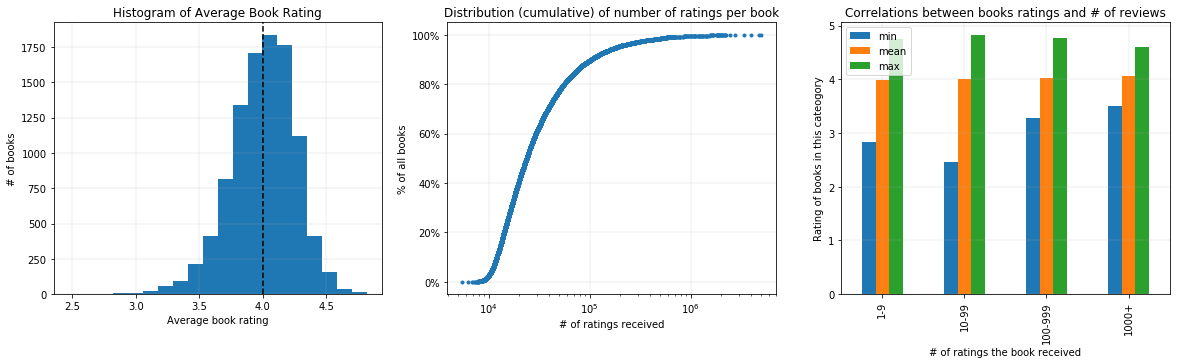

In [5]:
# Plot book statistics: distribution of mean rating, number of ratings, and ratings per group.

plt.figure(figsize=(20,5))

# Distribution of average book rating
ax1 = plt.subplot(1,3,1)
plt.hist(df_books.average_rating, bins=20);
plt.axvline(x=mean_rating, c='black', linestyle='--')
ax1.set_xlabel('Average book rating');
ax1.set_ylabel('# of books');
ax1.set_title('Histogram of Average Book Rating', fontsize=12);
ax1.grid(linewidth=.2);

# Distribution of number of book ratings
def ecdf(array):
    """Compute ECDF for 1D array of measurement data."""
    # sort array to use as the x axis
    x = np.sort(array)    
    # use np.arange to create the y axis for cdf from 1/len to 1
    y = np.arange(1, len(array)+1)/len(array)
    return x,y

ax2 = plt.subplot(1,3,2)
x,y = ecdf(df_books.work_ratings_count)
ax2.plot(x, y, marker = '.', linestyle='none');
ax2.set_yticklabels(['{:.0%}'.format(x) for x in ax2.get_yticks()])
ax2.set_xscale('log');
ax2.set_xlabel('# of ratings received');
ax2.set_ylabel('% of all books');
ax2.set_title('Distribution (cumulative) of number of ratings per book');
ax2.grid(linewidth=.2);

# Correlation between average rating and count
ax3 = plt.subplot(1,3,3)
count_cat = np.log10(df_books.work_ratings_count)//1
book_by_rev_count = df_books.groupby(count_cat)['average_rating'].agg(['min','mean','max'])
book_by_rev_count.index = ['1-9','10-99','100-999','1000+']
book_by_rev_count.plot(kind='bar', ax=ax3);
ax3.set_xlabel('# of ratings the book received');
ax3.set_ylabel('Rating of books in this cateogory');
ax3.set_title('Correlations between books ratings and # of reviews');
ax3.legend(loc='upper left');
ax3.grid(linewidth=.2);

plt.show()

# 2. Correlation Among Numerical Features

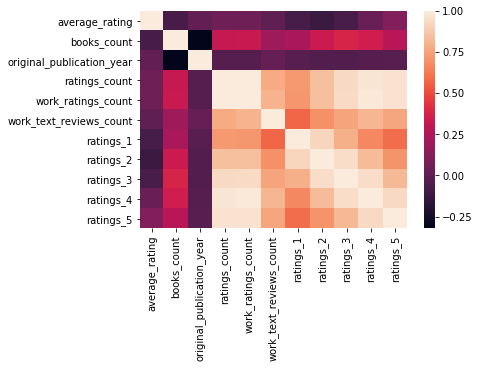

In [6]:
# plot correlation matrix for numerical columns

numerical_cols = ['average_rating', 'books_count', 'original_publication_year',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5']

corr = df_books[numerical_cols].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [7]:
corr.average_rating.abs().sort_values(ascending=False).head()

average_rating    1.000000
ratings_2         0.115875
ratings_5         0.115412
ratings_1         0.077997
books_count       0.069888
Name: average_rating, dtype: float64

## None of the numeric features in this dataset have a strong correlation with mean book rating.
* A user is more likely to take the time to write a review if they're rating the book with 4 stars. They're least likely to leave a review with a 1-star rating.
* **The strongest indicator of a low average rating is the presence of 2-star ratings.** Mathematically, we might expect that a 1-star rating would bring the average down more. However, 2-star ratings are less common than 1-star ratings, which might make them more significant. With a 0.116 correlation, it's still a fairly weak predictor.
* Unsurprisingly, 5-star ratings have the next strongest correlation to average rating.
* The older the book, the more editions it will have. 
* Having more editions of a book has a slightly negative correlation with average rating.

## Ratio of 2-star ratings to overall number of ratings
We saw in the correlation matrix that a book's average rating is negatively correlated with the number of 2-star ratings it received. 2-stars is the least common rating, which may make them a telling measure of how good a book is.

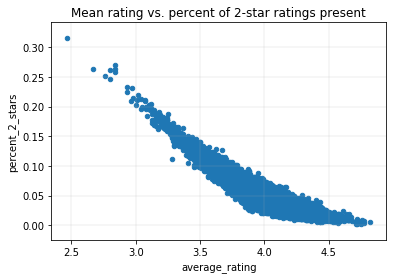

In [8]:
# Add a column to the data frame that calculates the percent of 2-star ratings each book has.
df_books['percent_2_stars'] = df_books.ratings_2/df_books.work_ratings_count

# Plot % of 2-star ratings vs. mean rating per book
df_books.plot.scatter(x='average_rating', y='percent_2_stars')
plt.title('Mean rating vs. percent of 2-star ratings present')
plt.grid(linewidth=.2)
plt.show()

## Written Reviews vs. Star Ratings

No handles with labels found to put in legend.


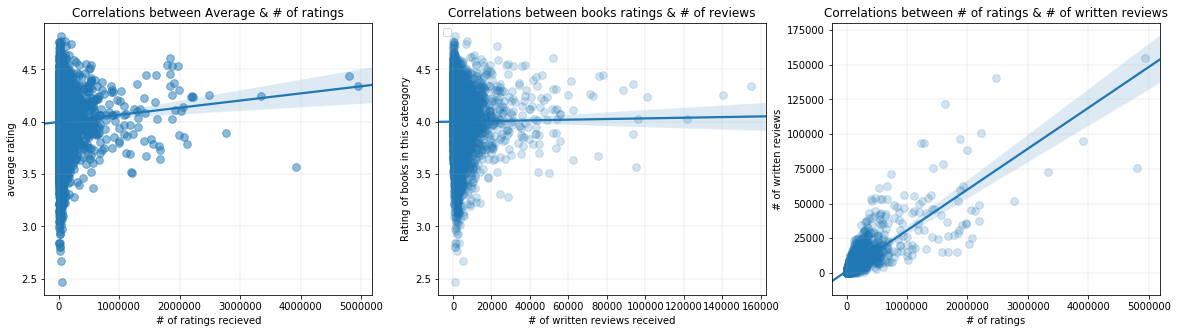

In [9]:
# Plot correlation of Average rating vs. # of ratings vs # written reviews.

plt.figure(figsize=(20,5))

# Correlation between average rating and review count
## There appears to be only a slight rise in average rating when a book is reviewed more often.
ax1 = plt.subplot(1,3,1)
sns.regplot(x="work_ratings_count", y="average_rating", data=df_books, fit_reg = True, 
            scatter_kws={'alpha':0.5, 's':60});
ax1.set_xlabel('# of ratings recieved');
ax1.set_ylabel('average rating');
ax1.set_title('Correlations between Average & # of ratings', fontsize=12);
ax1.grid(linewidth=.2);

# Correlation between average rating and # written reviews
ax2 = plt.subplot(1,3,2)
sns.regplot(x="work_text_reviews_count", y="average_rating", data=df_books, fit_reg = True, 
            scatter_kws={'alpha':0.2, 's':60})
ax2.set_xlabel('# of written reviews received');
ax2.set_ylabel('Rating of books in this cateogory');
ax2.set_title('Correlations between books ratings & # of reviews');
ax2.legend(loc='upper left');
ax2.grid(linewidth=.2);

# Correlation between # of ratings and # written reviews
ax3 = plt.subplot(1,3,3)
sns.regplot(x="work_ratings_count", y="work_text_reviews_count", data=df_books, 
            fit_reg = True, scatter_kws={'alpha':0.2, 's':60})
ax3.set_xlabel('# of ratings');
ax3.set_ylabel('# of written reviews');
ax3.set_title('Correlations between # of ratings & # of written reviews');
ax3.grid(linewidth=.2);

plt.show()

* A book's average rating does not correlate strongly with the number of times it's rated nor the number of time a written review is left. We do, however, see a strong relationship between the number rating and the number of written reviews. **The more often a book is rated, the more likely it is to receive written reviews.**

## 3. Most commonly read books: Young adult fantasy series
The books with the most ratings (and we assume, the most widely read) are the first book in young adult series (The Hunger Games, Harry Potter, Twilight, Divergent, and the Hobbit).  
Books assigned in school. Many books on this list are also banned books or frequently challenged books: Harry Potter, To Kill a Mockingbird, The Great Gatsby, The Catcher in the Rye.

### A lot of people have read Twilight. Most didn't think it was very good.
Vampires, werewolves, and moody teens have been popular in recent years and the first book of the Twilight series was rated by nearly 400,000 GoodReads users. It's the 3rd most rated book on this dataset. However, you have to go all the way down the list to the 46th most rated book ("Eat, Pray, Love") before find one that's rated lower than Twilight's 3.57 average.

In [10]:
# Most often rated books

df_books.sort_values(by='work_ratings_count', ascending=False).head(10)[[
    'title', 'work_ratings_count', 'average_rating']]

,title,work_ratings_count,average_rating
0,"The Hunger Games (The Hunger Games, #1)",4942365,4.34
1,Harry Potter and the Sorcerer's Stone (Harry P...,4800065,4.44
2,"Twilight (Twilight, #1)",3916824,3.57
3,To Kill a Mockingbird,3340896,4.25
4,The Great Gatsby,2773745,3.89
5,The Fault in Our Stars,2478609,4.26
11,"Divergent (Divergent, #1)",2216814,4.24
6,The Hobbit,2196809,4.25
9,Pride and Prejudice,2191465,4.24
7,The Catcher in the Rye,2120637,3.79


## 4. Highest rated books: 
**Calvin and Hobbes** and **Harry Potter** top the charts for most beloved books. Although they have very different story lines (one is a humorous comic strip and the other is an epic fantasy adventure story), the protagonist of both books series is a young boy. Many people started reading these books as children and continued to enjoy them as adults. The ageless appeal of these works seem to translate into chart-topping ratings.

In [11]:
# Highest rated books

books_by_rating = df_books.sort_values(by='average_rating', ascending=False)
books_by_rating.head(10)[['title', 'work_ratings_count', 'average_rating']]

,title,work_ratings_count,average_rating
3627,The Complete Calvin and Hobbes,29968,4.82
3274,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",33424,4.77
861,"Words of Radiance (The Stormlight Archive, #2)",108176,4.77
8853,Mark of the Lion Trilogy,9547,4.76
7946,ESV Study Bible,10784,4.76
4482,It's a Magical World: A Calvin and Hobbes Coll...,23429,4.75
6360,There's Treasure Everywhere: A Calvin and Hobb...,17285,4.74
421,"Harry Potter Boxset (Harry Potter, #1-7)",204125,4.74
3752,"Harry Potter Collection (Harry Potter, #1-6)",26274,4.73
6919,The Indispensable Calvin and Hobbes,16911,4.73


## Highest rate books after Calvin and Hobbes and Harry Potter: Christian Literature and Fantasy Novels
- Words of Radiance = epic fantasy novel
- Mark of the Lion Trilogy = historical fiction with a christian heroine
- A Court of Mist and Fury = fantasy romance
- The Revenge of the Baby-Sat = another Calvin and Hobbes complelation
- The Absolute Sandman = fantasy
- The Way of Kings, Part 1 = fantasy

In [12]:
books_by_rating[~books_by_rating.title.str.contains('Calvin') & 
                ~books_by_rating.title.str.contains('Harry')].head(11)[[
                'title', 'work_ratings_count', 'average_rating']]

,title,work_ratings_count,average_rating
861,"Words of Radiance (The Stormlight Archive, #2)",108176,4.77
8853,Mark of the Lion Trilogy,9547,4.76
7946,ESV Study Bible,10784,4.76
9565,Attack of the Deranged Mutant Killer Monster S...,12197,4.72
1307,A Court of Mist and Fury (A Court of Thorns an...,126491,4.72
8977,The Revenge of the Baby-Sat,12946,4.71
9075,Preach My Gospel: A Guide To Missionary Service,10194,4.71
5918,Life Application Study Bible: NIV,14774,4.67
9140,"The Way of Kings, Part 1 (The Stormlight Archi...",10117,4.67
4777,The Holy Bible: English Standard Version,23236,4.66


## 5. Book Ratings: Mean, Count, and Variance

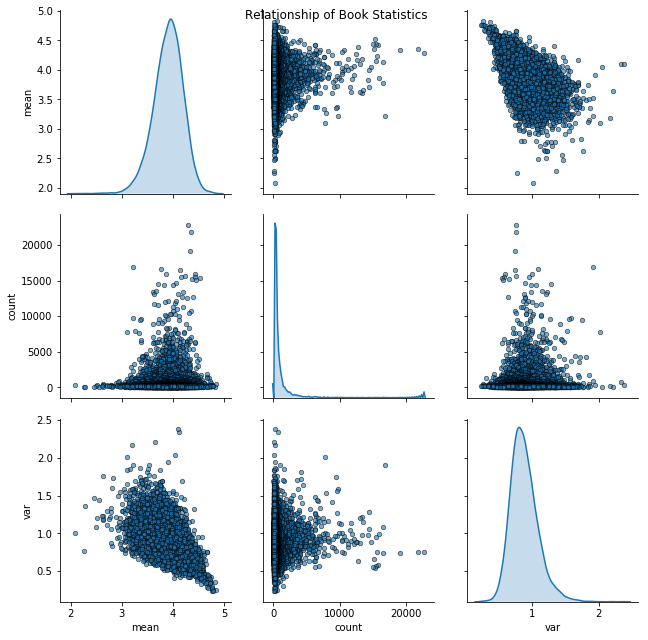

In [13]:
#Examine book rating stats

# Calculate statistics for each book
book_stats = df_ratings.groupby('book_id')['rating'].agg(['mean', 'count','std','var'])

# Create a pair plot with a density plot of the # diagonal and format the scatter plots.

sns.pairplot(book_stats[['mean', 'count', 'var']], diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 20, 'edgecolor': 'k'},
             height = 3)
plt.suptitle('Relationship of Book Statistics')
plt.show()

* Variance vs. mean - It makes sense that books with a mean rating close to the maximum of 5-stars will always have a low variance. Mathematically, the only way it will achieve a high mean is if most of it's ratings are around 5-stars.
* **The most compelling or thought-provoking books are likely to have a high variance as well as a relatively good mean rating.**

Next, we'll explore books with high variance. To ensure consistency, we'll restrict the list to works with at least 300 ratings.

# 6. Religion and Sexuality are controversial

The most polarizing ideas tend to have the strongest followings, because they evoke powerful emotions, whether of passion or hatred. When building book recommendations, these highly contested books may be the most helpful indicators for future suggestions. And what's divided people more over the centuries than religion?

Below is a list of 15 books that a significant number of people have rated (count > 300) with wide spread of high and low ratings (VAR > 1.5).

* ***The Book of Mormon***, ***The Qur'an***, and ***The Holy Bible*** are all in the top 15 most controversial books in our dataset. Though not holy texts, most other books on the list have a foundation in religion.

* ***The Secret*** is a self help book teaching positive-thinking to directly affect one's life. 

* ***Atlas Shruged*** is a novel with controversial commentary on government and theology. Ayn Rand's other novel, ***Fountainhead*** also made the list when it was narrowed down to books that were rated at least 1000 times.

* ***The Shack*** is a Christian based novel with an unconventional interpretations of God and the Holy Trinity.

* ***Left Behind*** is a novel that takes place during the Rapture and the weeks that follow.

* The ***Twilight*** series is a love saga about vampires and werewolves. On the surface that doesn't seem controversial, however it's themes include prejudice, Mormonism, teen sex vs. abstinence, and feminism. The book is both widely loved and widely hated.

* Last to be discussed, but definitely not least on the list is the ***Fifty Shades of Grey*** series. This widely-read erotic romance trilogy has been accused of romanticizing abusive relationships and misrepresenting BDSM practices.



In [14]:
# Identify the books with high VAR (>1.5) and significant COUNT (>300)

# Add 'title' column to the ratings dataframe
book_stats_with_titles = pd.merge(book_stats, df_books[['book_id', 'title']], 
                               how='left', on='book_id')

high_var_books = book_stats_with_titles[book_stats_with_titles['count'] > 300
                                       ].sort_values(by=['var'], ascending=False)
high_var_books.head(15)

,book_id,mean,count,std,var,title
1337,1338,4.104762,735,1.528536,2.336421,The Book of Mormon: Another Testament of Jesus...
33,34,3.092439,7724,1.419514,2.015020,"Fifty Shades of Grey (Fifty Shades, #1)"
2081,2082,3.907591,303,1.394659,1.945075,The Qur'an / القرآن الكريم
2,3,3.214341,16931,1.381661,1.908987,"Twilight (Twilight, #1)"
991,992,3.519313,932,1.381422,1.908327,"The Twilight Saga (Twilight, #1-4)"
2020,2021,3.501171,427,1.360707,1.851524,"The Twilight Collection (Twilight, #1-3)"
302,303,3.155556,1665,1.359774,1.848985,"The Secret (The Secret, #1)"
254,255,3.488526,4227,1.345990,1.811688,Atlas Shrugged
842,843,3.635889,574,1.328241,1.764225,"Fifty Shades Trilogy (Fifty Shades, #1-3)"
55,56,3.354924,9433,1.321421,1.746153,"Breaking Dawn (Twilight, #4)"


## Exploring the User DataFrame

In [15]:
df_ratings.head(3)

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5


## 7. Distribution of Ratings

* A huge portion of the ratings are 4- and 5-stars.

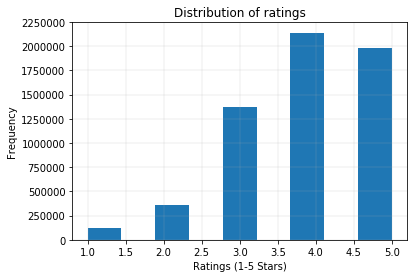

In [16]:
# Distribution of ratings
df_ratings['rating'].plot(kind='hist', bins=9)
plt.xlabel('Ratings (1-5 Stars)')
plt.ylabel('Frequency')
plt.title('Distribution of ratings', fontsize=12)
plt.grid(linewidth=.2)
#plt.yscale('log')
plt.show()

## 8. Closer look at user ratings: Mean, Count & Variance

User rating stats
             mean  count       std       var
user_id                                     
1        3.589744    117  0.957312  0.916446
2        4.415385     65  0.845804  0.715385
3        1.736264     91  0.892377  0.796337
4        3.768657    134  0.995586  0.991191
5        4.040000    100  0.737454  0.543838


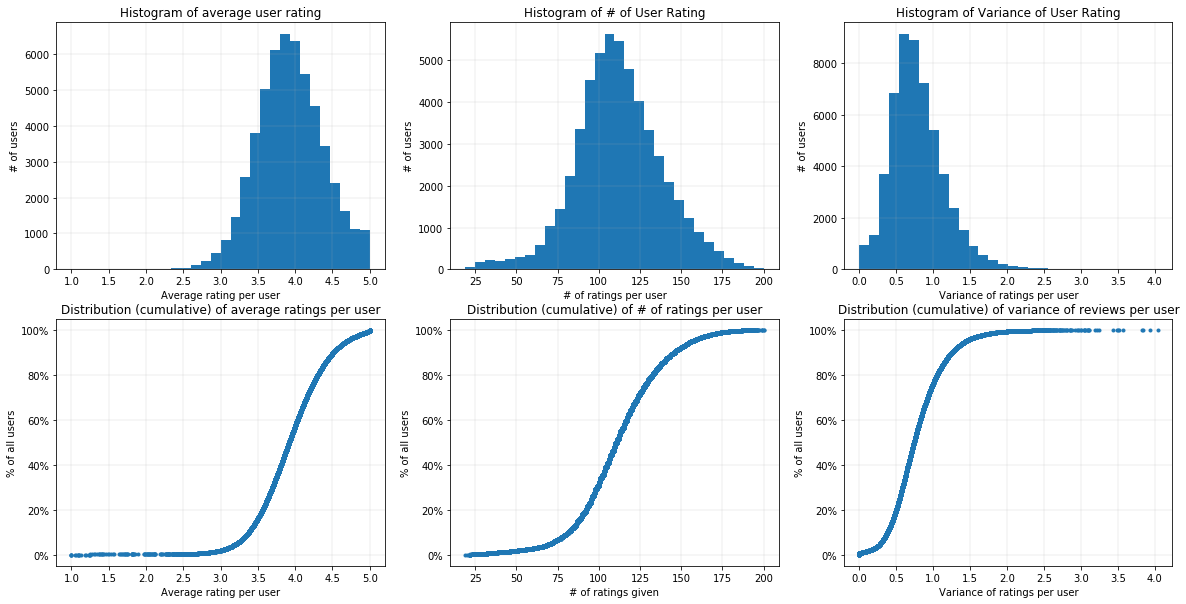

In [17]:
#Examine User rating stats
user_stats = df_ratings.groupby('user_id')['rating'].agg(['mean', 'count','std','var'])

print('User rating stats')
print(user_stats.head())

plt.figure(figsize=(20,10))

# Distribution of average rating per user
ax1 = plt.subplot(2,3,1)
user_stats['mean'].plot(kind='hist', bins=30, ax=ax1);
ax1.set_xlabel('Average rating per user');
ax1.set_ylabel('# of users');
ax1.set_title('Histogram of average user rating', fontsize=12);
ax1.grid(linewidth=.2);

# Distribution of number of ratings per user
ax2 = plt.subplot(2,3,2)
user_stats['count'].plot(kind='hist', bins=30, ax=ax2);
ax2.set_xlabel('# of ratings per user');
ax2.set_ylabel('# of users');
ax2.set_title('Histogram of # of User Rating', fontsize=12);
ax2.grid(linewidth=.2);


# Distribution of rating variance per user
ax3 = plt.subplot(2,3,3)
user_stats['var'].plot(kind='hist', bins=30, ax=ax3);
ax3.set_xlabel('Variance of ratings per user');
ax3.set_ylabel('# of users');
ax3.set_title('Histogram of Variance of User Rating', fontsize=12);
ax3.grid(linewidth=.2);

# Cumulative distributions
def ecdf(array):
    """Compute ECDF for 1D array of measurement data."""
    # sort array to use as the x axis
    x = np.sort(array)    
    # use np.arange to create the y axis for cdf from 1/len to 1
    y = np.arange(1, len(array)+1)/len(array)
    return x,y

# Distribution of average user ratings
ax4 = plt.subplot(2,3,4)
x,y = ecdf(user_stats['mean'])
ax4.plot(x, y, marker = '.', linestyle='none');
ax4.set_yticklabels(['{:.0%}'.format(x) for x in ax4.get_yticks()])
ax4.set_xlabel('Average rating per user');
ax4.set_ylabel('% of all users');
ax4.set_title('Distribution (cumulative) of average ratings per user');
ax4.grid(linewidth=.2);

# Distribution of number of user ratings
ax5 = plt.subplot(2,3,5)
x,y = ecdf(user_stats['count'])
ax5.plot(x, y, marker = '.', linestyle='none');
ax5.set_yticklabels(['{:.0%}'.format(x) for x in ax5.get_yticks()])
ax5.set_xlabel('# of ratings given');
ax5.set_ylabel('% of all users');
ax5.set_title('Distribution (cumulative) of # of ratings per user');
ax5.grid(linewidth=.2);

# Distribution of standard deviation of user ratings
ax6 = plt.subplot(2,3,6)
x,y = ecdf(user_stats['var'])
ax6.plot(x, y, marker = '.', linestyle='none');
ax6.set_yticklabels(['{:.0%}'.format(x) for x in ax6.get_yticks()])
ax6.set_xlabel('Variance of ratings per user');
ax6.set_ylabel('% of all users');
ax6.set_title('Distribution (cumulative) of variance of reviews per user');
ax6.grid(linewidth=.2);

### User rating stats - They like what they read
* Only 20% of users have an average rating that's less than 3.5 stars. This could suggest a couple things: Goodreads users like reading and have a positive bias towards books in general; people are more likely to take the time to rate something they like; or 
* 80% of users only vary their ratings by 1 stars. For example, a user might always give books 4-star or 5-star ratings. Another might only give out 2-star or 3-star ratings. 

## 9. Do low raters vary their ratings more than high raters?

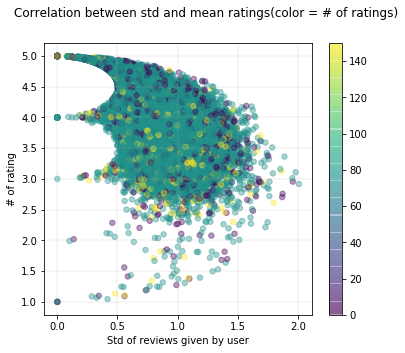

In [18]:
# Correlation between std and mean ratings per user
## Color points based on the number of ratings each user gave (0-75 vs 76-150 vs 151-200)

colors = user_stats['count']//75*75

plt.figure(figsize=(6,5))
plt.scatter(x=user_stats['std'], y=user_stats['mean'], c=colors, s=30, alpha=0.4)
plt.xlabel('Std of reviews given by user')
plt.ylabel('# of rating')
plt.suptitle('Correlation between std and mean ratings(color = # of ratings)')
plt.colorbar()
plt.grid(linewidth=.2)
plt.show()

* Again, we see that most users give an average rating of 3.5-5 stars, and don't vary their ratings by much more than 1 point.
* The interesting areas are along the y-axis where variance = 0. These are users who rate all books the same way. There's a high concentration of people who give every book 4-stars or every book 5-stars. 
* The group who only ever give out 1-star is smaller. It's rare for a user to give all books 3-stars, and there isn't a single user in our sample who only gives 2-star ratings.
* The pattern of how high & how varied ratings are doesn't seem to be affected by how many books a user has rated.

# Exploring Tags and Genres
GoodReads has a standard set of tags that can be used, however they aren't limited. Users can create custom tags, as well. Because of the open ended nature of this, there can be many variations of the same theme, ex. "owned", "books-i-own", "owned-books", "i-own" are all separate tags. This makes comprehensive analysis tricky. To complie a set of meaninful, common genres, we need to narrow down the tags list.

## 10. Most commonly used tags

More evidence that GoodReads members like books: the top 3 most used tags are "to-read", "favorites", and "owned".

In [19]:
# Merge book_tags and tag description data on 'tag_id'
df_tags_desc = pd.merge(df_book_tags, df_tags, on='tag_id')
df_book_tags_desc = pd.merge(df_tags_desc, df_books[['goodreads_book_id', 'title']], on='goodreads_book_id')
df_book_tags_desc.head(3)

,goodreads_book_id,tag_id,count,tag_name,title
0,1,30574,167697,to-read,Harry Potter and the Half-Blood Prince (Harry ...
1,1,11305,37174,fantasy,Harry Potter and the Half-Blood Prince (Harry ...
2,1,11557,34173,favorites,Harry Potter and the Half-Blood Prince (Harry ...


In [20]:
# Determine which tags are used most often, in order to narrow down the list
# Group by tag_name and count number of books they've been used for.
tag_frequency = df_book_tags_desc.groupby(['tag_name'])['goodreads_book_id'].count() \
                .sort_values(ascending=False)

print(tag_frequency.head(15))

tag_name
to-read              9983
favorites            9881
owned                9858
books-i-own          9799
currently-reading    9776
library              9415
owned-books          9221
fiction              9097
to-buy               8692
kindle               8316
default              8239
ebook                8054
my-books             7561
audiobook            7242
ebooks               7203
Name: goodreads_book_id, dtype: int64


## 11. Most Common Book Genres

Fantasy, Romance, Mystery and Young Adult genres were each tagged on 3,600-4,300 books.

In [21]:
genres = ["art", "biography", "chick-lit", "childrens", "christian", "classics", 
          "fantasy", 'food', "graphic-novels", 
          "historical-fiction", "history", "horror", "humor",   
          "mystery", 'novels', 
          "paranormal", "philosophy", "poetry", "psychology", 'reference', 'realistic-fiction',
          "religion", "romance", "science", "science-fiction", "self-help", 'short-stories', 
          "travel", "young-adult"]

sub_genres = ['action', 'adult-fiction', 'adventure', 'american', "business", 
              'contemporary-romance', 
               "comics", "cookbooks", "crime", 'erotica', 'dark', 'drama', 'dystopia', 
              'feminism', 'funny', 
               'historical', 'historical-romance', 'literary-fiction', 'literature', 'lgbt', 
              'love', 
              'manga', "memoir", "music", 'mystery-thriller', 'mythology', 'non-fiction', 
              'paranormal-romance', 'politics', 
              'suspense', 'school', 'speculative-fiction', "spirituality",
              "thriller", 'urban-fantasy', 'war', 'sports'] 

all_genres = sub_genres + genres

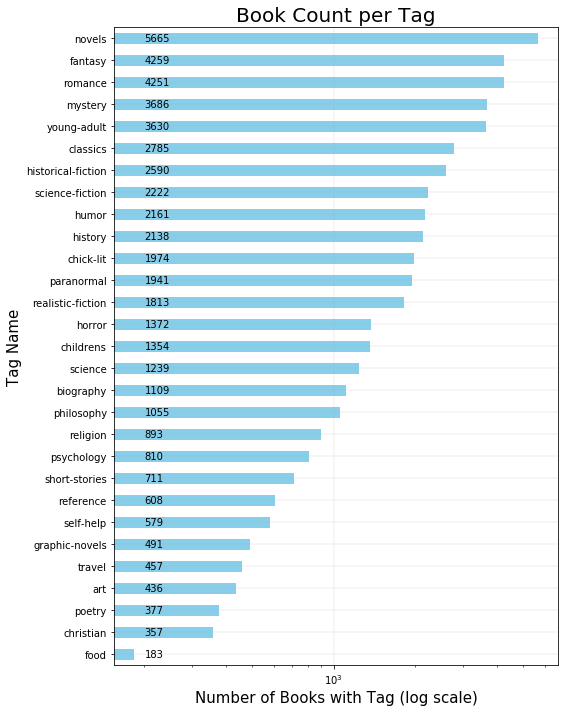

In [22]:
#Histogram of main genre tags
tags = tag_frequency.loc[genres].sort_values()

fig = plt.figure(figsize = (8,10))
_ = tags.plot.barh(color="skyblue")

# Include numeric counts on each bar
for i, v in enumerate(tags):
    plt.text(200, i, str(v), va = 'center', color='black') #, fontweight='bold')

_ = plt.grid(linewidth=.2)
_ = plt.xscale('log')
_ = plt.title('Book Count per Tag', fontsize=20)
_ = plt.xlabel('Number of Books with Tag (log scale)', fontsize=15)
_ = plt.ylabel('Tag Name', fontsize=15)

plt.tight_layout()
plt.show()

# Genre analysis

## Are genres rated differently?
* Slightly poorer performing genres: 'chick-lit' 'novels'
* Slightly better performing genres: 'childrens' 'christian' 'fantasy' 'graphic-novels' 'paranormal'

In [23]:
df_book_tags_desc.head(3)

,goodreads_book_id,tag_id,count,tag_name,title
0,1,30574,167697,to-read,Harry Potter and the Half-Blood Prince (Harry ...
1,1,11305,37174,fantasy,Harry Potter and the Half-Blood Prince (Harry ...
2,1,11557,34173,favorites,Harry Potter and the Half-Blood Prince (Harry ...


In [24]:
## Count genre tags per book

# Subset tag df to only include tags in the genre list
df_genres_book_tags = df_book_tags_desc[df_book_tags_desc.tag_name.isin(genres)]
genres_frequency = df_genres_book_tags.groupby(['goodreads_book_id'])['tag_name'].count()

#Sort tag list by genre (not necessary unless visualizing)
genres_groups = df_genres_book_tags.sort_values(by=['count', 'goodreads_book_id'], 
                                                ascending=False)

# Cross tabulate to get a df with each row is a book, each column is a genre,
# and the values show percent of times each book was tagged with each genre.
df_genres_per_book = pd.crosstab(index=df_genres_book_tags['goodreads_book_id'], 
                              columns=df_genres_book_tags['tag_name'], 
                             values=df_genres_book_tags['count'], aggfunc='sum', 
                                 normalize='index').fillna(0)

# Add genre counts into the metadata per book in the books dataframe.
df_books_with_genre_counts = pd.merge(df_books, df_genres_per_book, on='goodreads_book_id')

df_books_with_genre_counts.head(2)

,book_id,goodreads_book_id,books_count,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,percent_2_stars,art,biography,chick-lit,childrens,christian,classics,fantasy,food,graphic-novels,historical-fiction,history,horror,humor,mystery,novels,paranormal,philosophy,poetry,psychology,realistic-fiction,reference,religion,romance,science,science-fiction,self-help,short-stories,travel,young-adult
0,1,2767052,272,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,0.025886,0.0,0.0,0.0,0.00000,0.0,0.000000,0.217499,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.018145,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.06706,0.0,0.17607,0.0,0.0,0.0,0.521226
1,2,3,491,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,0.021182,0.0,0.0,0.0,0.05403,0.0,0.026789,0.670120,0.0,0.0,0.0,0.0,0.0,0.0,0.009273,0.015272,0.013028,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.211489


Slightly poorer performing genres: ['chick-lit' 'novels']
Slightly better performing genres: ['childrens' 'christian' 'fantasy' 'graphic-novels' 'paranormal']


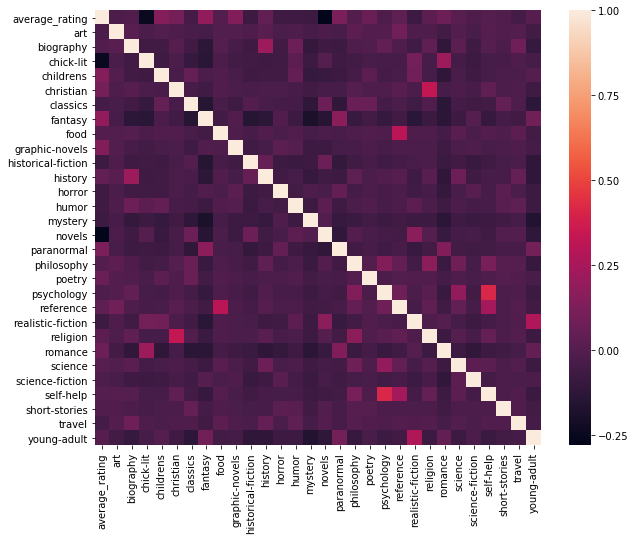

In [25]:
# plot correlation matrix for numerical columns

genre_rating_cols = ['average_rating'] + genres

# Calculate correlation values of genre to average rating for a book
corr = df_books_with_genre_counts[genre_rating_cols].corr()

#Which genres have the strongest (positive or negative) correlations with ratings? 
print('Slightly poorer performing genres:', corr[corr.average_rating < -0.10].index.values)
print('Slightly better performing genres:', corr[(corr.average_rating < 1) & 
                                                 (corr.average_rating > 0.10)].index.values)
#Visualize
fig = plt.figure(figsize = (10,8))
_ = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [26]:
print('Slightly poorer performing genres:', corr[corr.average_rating < -0.10].index.values)
print('Slightly better performing genres:', corr[(corr.average_rating < 1) & 
                                                 (corr.average_rating > 0.10)].index.values)

Slightly poorer performing genres: ['chick-lit' 'novels']
Slightly better performing genres: ['childrens' 'christian' 'fantasy' 'graphic-novels' 'paranormal']
